In [1]:
import numpy
import pickle
import h5py
import matplotlib.pyplot as plt
import time
from scipy.ndimage import gaussian_filter
from scipy.optimize import minimize

from sscPimega import pi540D, misc, opt540D

(-0.5, 3071.5, 3071.5, -0.5)

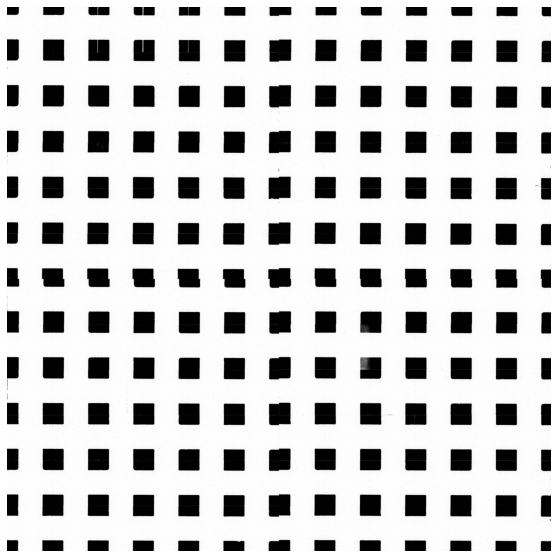

In [2]:
#img = h5py.File('../temp/template_10m-150s.hdf5','r')['entry/data/data/'][0,0,:,:]

img = h5py.File('../temp/2022-10-14_template_pos4_4727mm_20s_019.hdf5','r')['entry/data/data/'][0,0,:,:]

plt.figure(figsize=(10,10))
plt.imshow(numpy.clip(img,0,100), cmap='gray_r')
plt.axis('off')

In [3]:
## do not run this cell!!!!!!
##############################
'''  
import pickle

#file = 'annotationCAT202208/annot_20220803_0c1a54c0.pkl' #ok
#file = 'annotationCAT202208/annot_20220808_0c812ab7.pkl' #ok
#file = 'annotationCAT202208/annot_20220808_0095e0bd.pkl' #ok
#file = 'annotationCAT202208/annot_20220804_aa48226a.pkl' #ok
#file = 'annotationCAT202208/annot_20220808_c5e7b2af.pkl' #ok
#file = 'annotationCAT202208/annot_20220804_e10140c1.pkl' #ok
#file = 'annotationCAT202208/annot_20220804_b498c769.pkl' #ok
#file = 'annotationCAT202208/annot_20220808_7222c7b9.pkl' #ok
#file = 'annotationCAT202208/annot_20220808_ef02944d.pkl' #ok
file = 'annotationCAT202208/annot_20220808_feff6145.pkl'
with open(file,'rb') as f:
    dic = pickle.load(f)

print(dic)
    
for k,v in dic.items():
    if type(k) is not str:
        if 'horizontal' in v:
            dic.update({ k: (dic[k][0], dic[k][1], dic[k][2], 'vertical') } )
        elif 'vertical' in v:
            dic.update({ k: (dic[k][0], dic[k][1], dic[k][2], 'horizontal') } )
        else:
            dic.update({ k: (dic[k][0], dic[k][1], dic[k][2], 'euclidean') } )
            
print(dic)

with open(file, 'wb') as handle:
    pickle.dump(dic, handle)
'''

"  \nimport pickle\n\n#file = 'annotationCAT202208/annot_20220803_0c1a54c0.pkl' #ok\n#file = 'annotationCAT202208/annot_20220808_0c812ab7.pkl' #ok\n#file = 'annotationCAT202208/annot_20220808_0095e0bd.pkl' #ok\n#file = 'annotationCAT202208/annot_20220804_aa48226a.pkl' #ok\n#file = 'annotationCAT202208/annot_20220808_c5e7b2af.pkl' #ok\n#file = 'annotationCAT202208/annot_20220804_e10140c1.pkl' #ok\n#file = 'annotationCAT202208/annot_20220804_b498c769.pkl' #ok\n#file = 'annotationCAT202208/annot_20220808_7222c7b9.pkl' #ok\n#file = 'annotationCAT202208/annot_20220808_ef02944d.pkl' #ok\nfile = 'annotationCAT202208/annot_20220808_feff6145.pkl'\nwith open(file,'rb') as f:\n    dic = pickle.load(f)\n\nprint(dic)\n    \nfor k,v in dic.items():\n    if type(k) is not str:\n        if 'horizontal' in v:\n            dic.update({ k: (dic[k][0], dic[k][1], dic[k][2], 'vertical') } )\n        elif 'vertical' in v:\n            dic.update({ k: (dic[k][0], dic[k][1], dic[k][2], 'horizontal') } )\n    

{0: ((0, 213, 716), (0, 271, 716), -1, 'horizontal'), 1: ((0, 468, 831), (0, 528, 831), -1, 'horizontal'), 2: ((0, 785, 713), (0, 732, 714), -1, 'horizontal'), 3: ((0, 990, 828), (0, 1040, 828), -1, 'horizontal'), 4: ((0, 1252, 711), (0, 1301, 710), -1, 'horizontal')}
{0: ((0, 458, 1763), (0, 458, 1818), -1, 'vertical'), 1: ((0, 575, 2035), (0, 575, 2082), -1, 'vertical'), 2: ((0, 715, 2275), (0, 715, 2336), -1, 'vertical'), 3: ((0, 832, 2540), (0, 832, 2592), -1, 'vertical'), 4: ((0, 717, 2781), (0, 719, 2843), -1, 'vertical')}
{0: ((0, 1983, 215), (0, 1984, 273), -1, 'vertical'), 1: ((0, 1984, 472), (0, 1985, 531), -1, 'vertical'), 2: ((0, 2102, 719), (0, 2101, 789), -1, 'vertical'), 3: ((0, 2102, 995), (0, 2102, 1038), -1, ''), 4: ((0, 2102, 1248), (0, 2103, 1311), -1, 'vertical')}
{0: ((0, 1738, 2242), (0, 1832, 2242), -1, 'horizontal'), 1: ((0, 1998, 2241), (0, 2090, 2240), -1, 'horizontal'), 2: ((0, 2257, 2240), (0, 2347, 2240), -1, 'horizontal'), 3: ((0, 2513, 2240), (0, 2600, 2

(-0.5, 3071.5, 3071.5, -0.5)

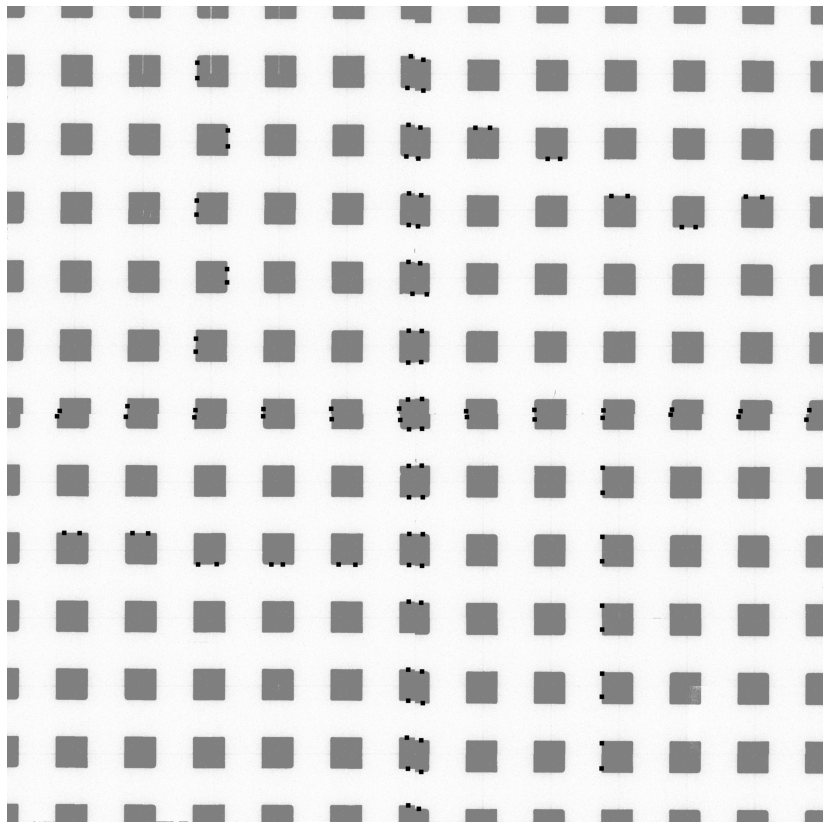

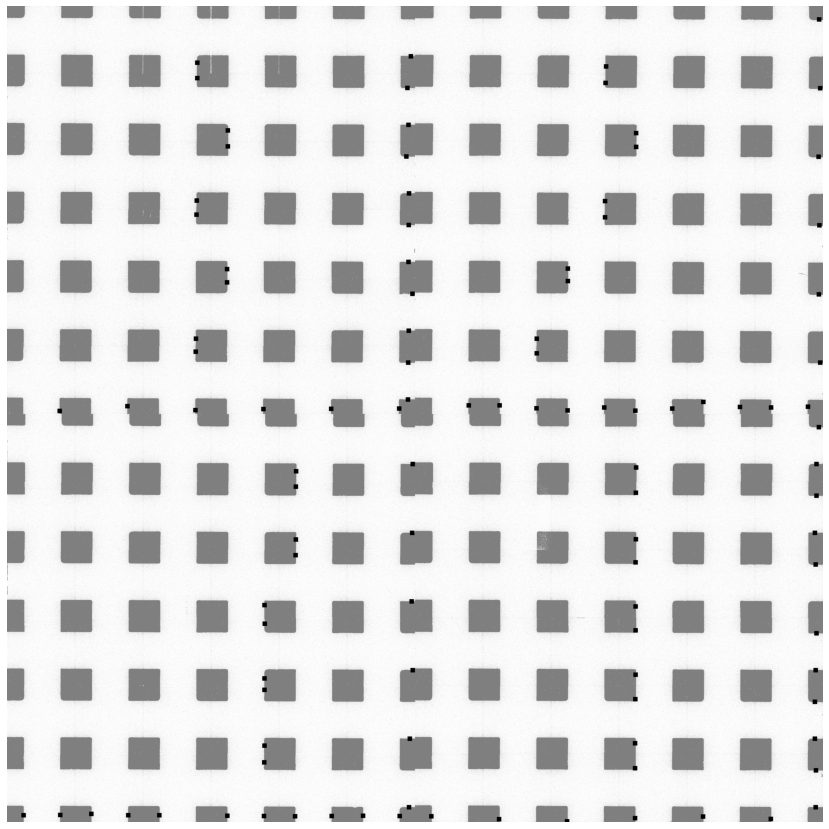

In [21]:
if False:
    pianno = ['annotationCAT202208/annot_20220808_d2debd5e.pkl']
    pianno += ['annotationCAT202208/annot_20220803_0c1a54c0.pkl'] #eu
    pianno += ['annotationCAT202208/annot_20220808_0095e0bd.pkl'] #eu
    pianno += [ 'annotationCAT202208/annot_20220808_bb45bca0.pkl'] #eu
    pianno += [ 'annotationCAT202208/annot_20220804_aa48226a.pkl' ] #matheus  !ok!  
    pianno +=  ['annotationCAT202208/annot_20220808_c5e7b2af.pkl'] #larissa !ok!
    pianno += [ 'annotationCAT202208/annot_20220804_e10140c1.pkl'] #paola   !ok! 
    pianno += [ 'annotationCAT202208/annot_20220804_b498c769.pkl'] #yuri !ok!
    pianno += [ 'annotationCAT202208/annot_20220808_7222c7b9.pkl'] #julia !ok
    pianno += [ 'annotationCAT202208/annot_20220808_0d55162a.pkl'] #yuri !ok!
    pianno += ['annotationCAT202208/annot_20220808_feff6145.pkl'] #paola !ok!
    pianno += ['annotationCAT202208/annot_20220808_ef02944d.pkl'] #larissa !ok!

if True:
    pianno = ['annotationCAT202210/annot_20221024_9deec17d.pkl'] #Paola ok
    pianno += ['annotationCAT202210/annot_20221024_ef329f71.pkl'] #Julia ok
    pianno += ['annotationCAT202210/annot_20221024_944c6dfc.pkl'] #Larissa ok#
    pianno += ['annotationCAT202210/annot_20221024_84db8a73.pkl'] #Yuri ok
    pianno += ['annotationCAT202210/annot_20221024_af44acea.pkl'] #Bernardi ok
    pianno += ['annotationCAT202210/annot_20221024_c0772c55.pkl'] #Miqueles ok

    
imga, imgo = opt540D.see_annotations_540D( numpy.clip(img,0,20), pianno, 'nonplanar' )

plt.figure(figsize=(15,15))
plt.imshow(imga, cmap='gray_r')
plt.axis('off')

plt.figure(figsize=(15,15))
plt.imshow(imgo, cmap='gray_r')
plt.axis('off')

In [22]:
start = time.time()

x, optparams, annotation = opt540D.optimize_540D( pianno, 'nonplanar' )

elapsed = time.time() - start

print('Optimization (sec):', elapsed)

Optimization (sec): 16.127037286758423


In [30]:
optparams['x']

{'a': array([0., 0., 0., 0.]),
 'rx': array([-6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75,
        -6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75, -6.75,
        -6.75, -6.75, -6.75, -6.75, -6.75, -6.75]),
 'ry': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 'rz': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 'offset': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 'ox': array([ -90.72660962,  -63.25296052,   16.98226961,   35.0772516 ,
          89.27059423,  124.72548294, -212.31345687, -116.45961454,
         -22.41896552,   56.14109804,  116.78865497,   45.08773692,
         -92.54939172,  -11.75287748,   13.13305114,   85.49641223,
          84.50338608,   61.52684817, -246.98045781, -293.02877083,
         206.49346356,  269.79768323,  222.8674323 ,  174.7

In [26]:
type(optparams)


dict

In [31]:
import pickle
with open("/ibira/lnls/beamlines/caterete/apps/geometry/pi540D_10_2022.pkl", "wb") as f:
    pickle.dump(optparams, f)
#optparams

(-0.5, 3071.5, 3071.5, -0.5)

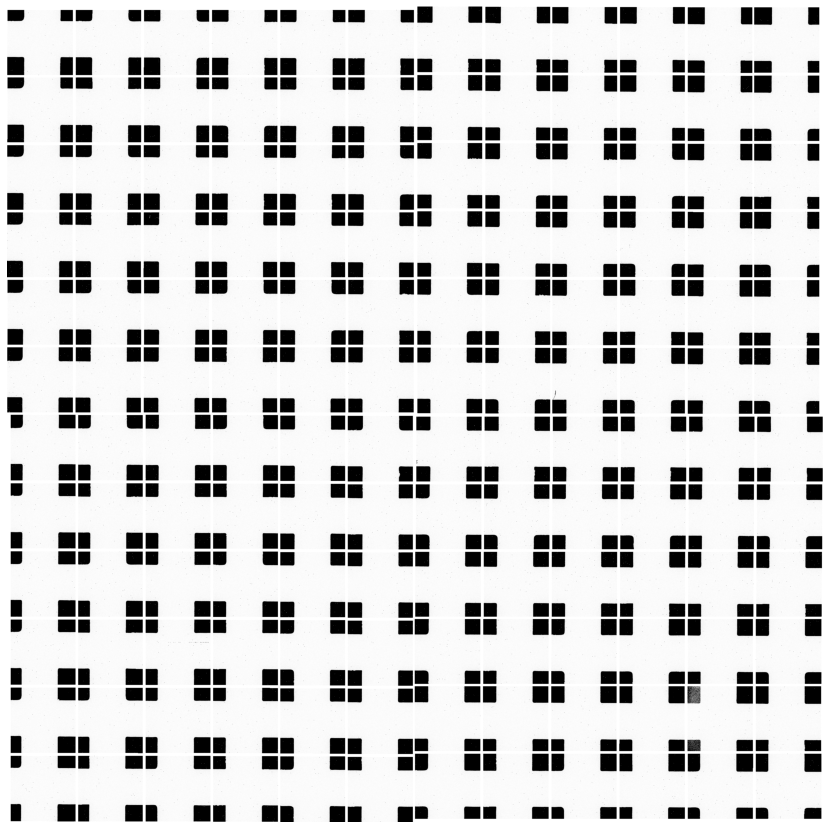

In [24]:
params  = {'geo':'nonplanar', 'opt':True, 'mode':'virtual' }

project = pi540D.get_detector_dictionary(10000, params )
project['s'] = [3,3]

geometry = pi540D.geometry540D( project )

restored = pi540D.backward540D( numpy.clip(img,0,100), geometry )

plt.figure(figsize=(15,15))
roi = 300
#plt.imshow(retored[restored.shape[0]//2-roi:restored.shape[0]//2+roi, restored.shape[1]//2-roi:restored.shape[1]//2+roi])
plt.imshow(restored, cmap='gray_r')
plt.axis('off')

In [ ]:
#img = h5py.File('/ibira/lnls/beamlines/caterete/proposals/20210072/data/AgBe_pink_2s_220810_001.hdf5','r')['entry/data/data/'][0,0,:,:]
#img = h5py.File('/ibira/lnls/beamlines/caterete/proposals/20210072/data/AgBe_mono_10s_220810_000.hdf5','r')['entry/data/data/'][0,0,:,:]

img = h5py.File('/ibira/lnls/beamlines/caterete/proposals/20210072/data/AgBe_mono_10s_220810_001.hdf5','r')['entry/data/data/'][0,0,:,:]





plt.figure(figsize=(15,15))
plt.imshow(numpy.clip(img,0,100), cmap='gray_r')
plt.axis('off')

{'geo': 'nonplanar', 'opt': True, 'mode': 'virtual'}


(-0.5, 3071.5, 3071.5, -0.5)

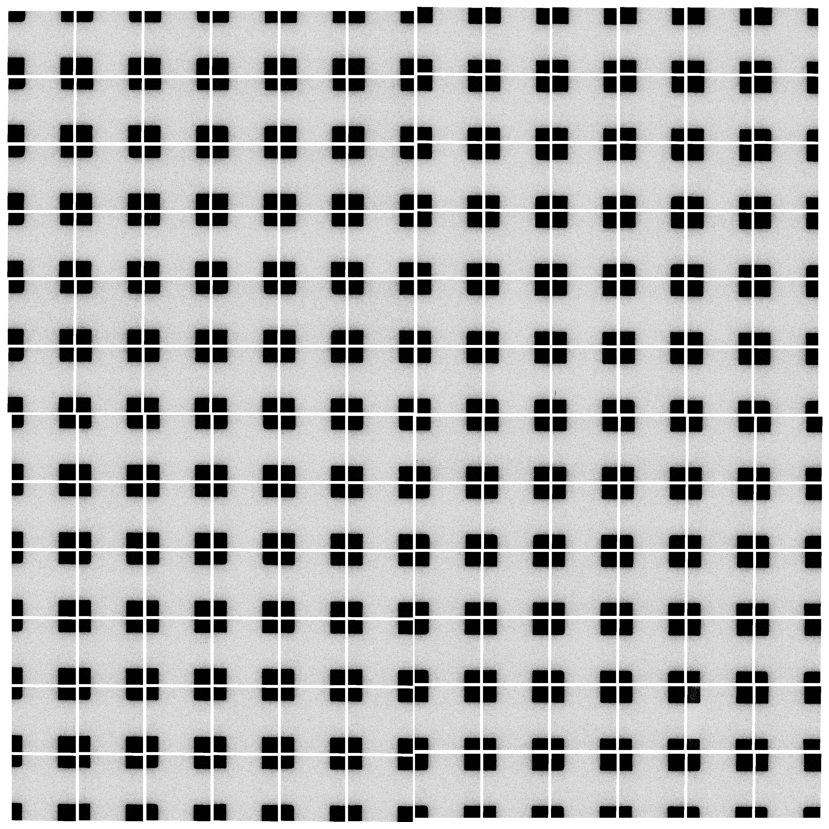

In [25]:
params  = {'geo':'nonplanar', 'opt':True, 'mode':'virtual' }

print( params )

project = pi540D.get_detector_dictionary(634, params )
project['s'] = [3,3]

geometry = pi540D.geometry540D( project )

restored = pi540D.backward540D( numpy.clip(img,0,10), geometry )

plt.figure(figsize=(15,15))
roi = 300
#plt.imshow(retored[restored.shape[0]//2-roi:restored.shape[0]//2+roi, restored.shape[1]//2-roi:restored.shape[1]//2+roi])
plt.imshow(restored, cmap='gray_r')
plt.axis('off')